# Rf 7 0 2_Efficiencyfit_ 2 D
Speecial p.d.f.'s: unbinned maximum likelihood fit of an efficiency eff(x) function to a dataset D(x,cut), where cut
is a category encoding a selection whose



**Author:** //  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:01 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooCategory.h"
#include "RooEfficiency.h"
#include "RooPolynomial.h"
#include "RooProdPdf.h"
#include "RooFormulaVar.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "TH1.h"
#include "RooPlot.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

 Arguments are defined. 

In [3]:
Bool_t flat = kFALSE;

Construct efficiency function e(x,y)
 -----------------------------------------------------------------------

Declare variables x,mean,sigma with associated name, title, initial value and allowed range

In [4]:
RooRealVar x("x", "x", -10, 10);
RooRealVar y("y", "y", -10, 10);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Efficiency function eff(x;a,b)

In [5]:
RooRealVar ax("ax", "ay", 0.6, 0, 1);
RooRealVar bx("bx", "by", 5);
RooRealVar cx("cx", "cy", -1, -10, 10);

RooRealVar ay("ay", "ay", 0.2, 0, 1);
RooRealVar by("by", "by", 5);
RooRealVar cy("cy", "cy", -1, -10, 10);

RooFormulaVar effFunc("effFunc", "((1-ax)+ax*cos((x-cx)/bx))*((1-ay)+ay*cos((y-cy)/by))",
                      RooArgList(ax, bx, cx, x, ay, by, cy, y));

Acceptance state cut (1 or 0)

In [6]:
RooCategory cut("cut", "cutr");
cut.defineType("accept", 1);
cut.defineType("reject", 0);

Construct conditional  efficiency pdf e(cut|x,y)
 ---------------------------------------------------------------------------------------------

Construct efficiency p.d.f eff(cut|x)

In [7]:
RooEfficiency effPdf("effPdf", "effPdf", effFunc, cut, "accept");

Generate data (x,y,cut) from a toy model
 -------------------------------------------------------------------------------

Construct global shape p.d.f shape(x) and product model(x,cut) = eff(cut|x)*shape(x)
 (These are _only_ needed to generate some toy MC here to be used later)

In [8]:
RooPolynomial shapePdfX("shapePdfX", "shapePdfX", x, RooConst(flat ? 0 : -0.095));
RooPolynomial shapePdfY("shapePdfY", "shapePdfY", y, RooConst(flat ? 0 : +0.095));
RooProdPdf shapePdf("shapePdf", "shapePdf", RooArgSet(shapePdfX, shapePdfY));
RooProdPdf model("model", "model", shapePdf, Conditional(effPdf, cut));

Generate some toy data from model

In [9]:
RooDataSet *data = model.generate(RooArgSet(x, y, cut), 10000);

[#0] WARNING:Generation -- RooAcceptReject::ctor(effPdf_Int[]_Norm[cut]) WARNING: performing accept/reject sampling on a p.d.f in 2 dimensions without prior knowledge on maximum value of p.d.f. Determining maximum value by taking 200000 trial samples. If p.d.f contains sharp peaks smaller than average distance between trial sampling points these may be missed and p.d.f. may be sampled incorrectly.
[#0] WARNING:Generation -- RooAcceptReject::ctor(effPdf_Int[]_Norm[cut]): WARNING: 200000 trial samples requested by p.d.f for 2-dimensional accept/reject sampling, this may take some time


Fit conditional efficiency pdf to data
 --------------------------------------------------------------------------

Fit conditional efficiency p.d.f to data

In [10]:
effPdf.fitTo(*data, ConditionalObservables(RooArgSet(x, y)));

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 ax           6.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 ay           2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 cx          -1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     4 cy          -1.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FC

Plot fitted, data efficiency
 --------------------------------------------------------

Make 2d histograms of all data, selected data and efficiency function

In [11]:
TH1 *hh_data_all = data->createHistogram("hh_data_all", x, Binning(8), YVar(y, Binning(8)));
TH1 *hh_data_sel = data->createHistogram("hh_data_sel", x, Binning(8), YVar(y, Binning(8)), Cut("cut==cut::accept"));
TH1 *hh_eff = effFunc.createHistogram("hh_eff", x, Binning(50), YVar(y, Binning(50)));

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(effFunc) WARNING extended mode requested for a non-pdf object, ignored


Some adjustment for good visualization

In [12]:
hh_data_all->SetMinimum(0);
hh_data_sel->SetMinimum(0);
hh_eff->SetMinimum(0);
hh_eff->SetLineColor(kBlue);

Draw all frames on a canvas

In [13]:
TCanvas *ca = new TCanvas("rf702_efficiency_2D", "rf702_efficiency_2D", 1200, 400);
ca->Divide(3);
ca->cd(1);
gPad->SetLeftMargin(0.15);
hh_data_all->GetZaxis()->SetTitleOffset(1.8);
hh_data_all->Draw("lego");
ca->cd(2);
gPad->SetLeftMargin(0.15);
hh_data_sel->GetZaxis()->SetTitleOffset(1.8);
hh_data_sel->Draw("lego");
ca->cd(3);
gPad->SetLeftMargin(0.15);
hh_eff->GetZaxis()->SetTitleOffset(1.8);
hh_eff->Draw("surf");

return;

Draw all canvases 

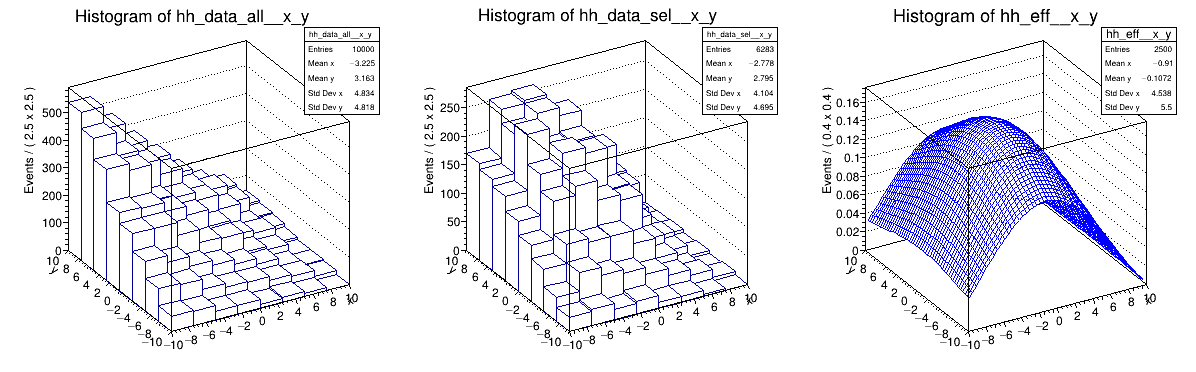

In [14]:
gROOT->GetListOfCanvases()->Draw()